In [1]:
import pandas as pd
 

bench_results = pd.read_csv('results.csv')
bench_results.head()

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio
0,all-titles.bin,DEFLATE_QPL,336.152716,646.196484,4.295883
1,all-titles.bin,LZ4HC(4),92.313783,2079.944932,5.328992
2,all-titles.bin,LZ4HC(6),53.161532,2218.607928,5.602804
3,all-titles.bin,LZ4HC(9),27.526153,2465.119920,5.709514
4,all-titles.bin,LZ4HC(12),14.431535,2147.039930,5.770906


In [2]:
import re

def codec_base(codec):
    parts = codec.split('(')
    if len(parts) == 1:
        return codec
    return parts[0]

bench_results['Algo'] = bench_results['Codec'].apply(lambda x: codec_base(x))
bench_results.head()

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio,Algo
0,all-titles.bin,DEFLATE_QPL,336.152716,646.196484,4.295883,DEFLATE_QPL
1,all-titles.bin,LZ4HC(4),92.313783,2079.944932,5.328992,LZ4HC
2,all-titles.bin,LZ4HC(6),53.161532,2218.607928,5.602804,LZ4HC
3,all-titles.bin,LZ4HC(9),27.526153,2465.119920,5.709514,LZ4HC
4,all-titles.bin,LZ4HC(12),14.431535,2147.039930,5.770906,LZ4HC


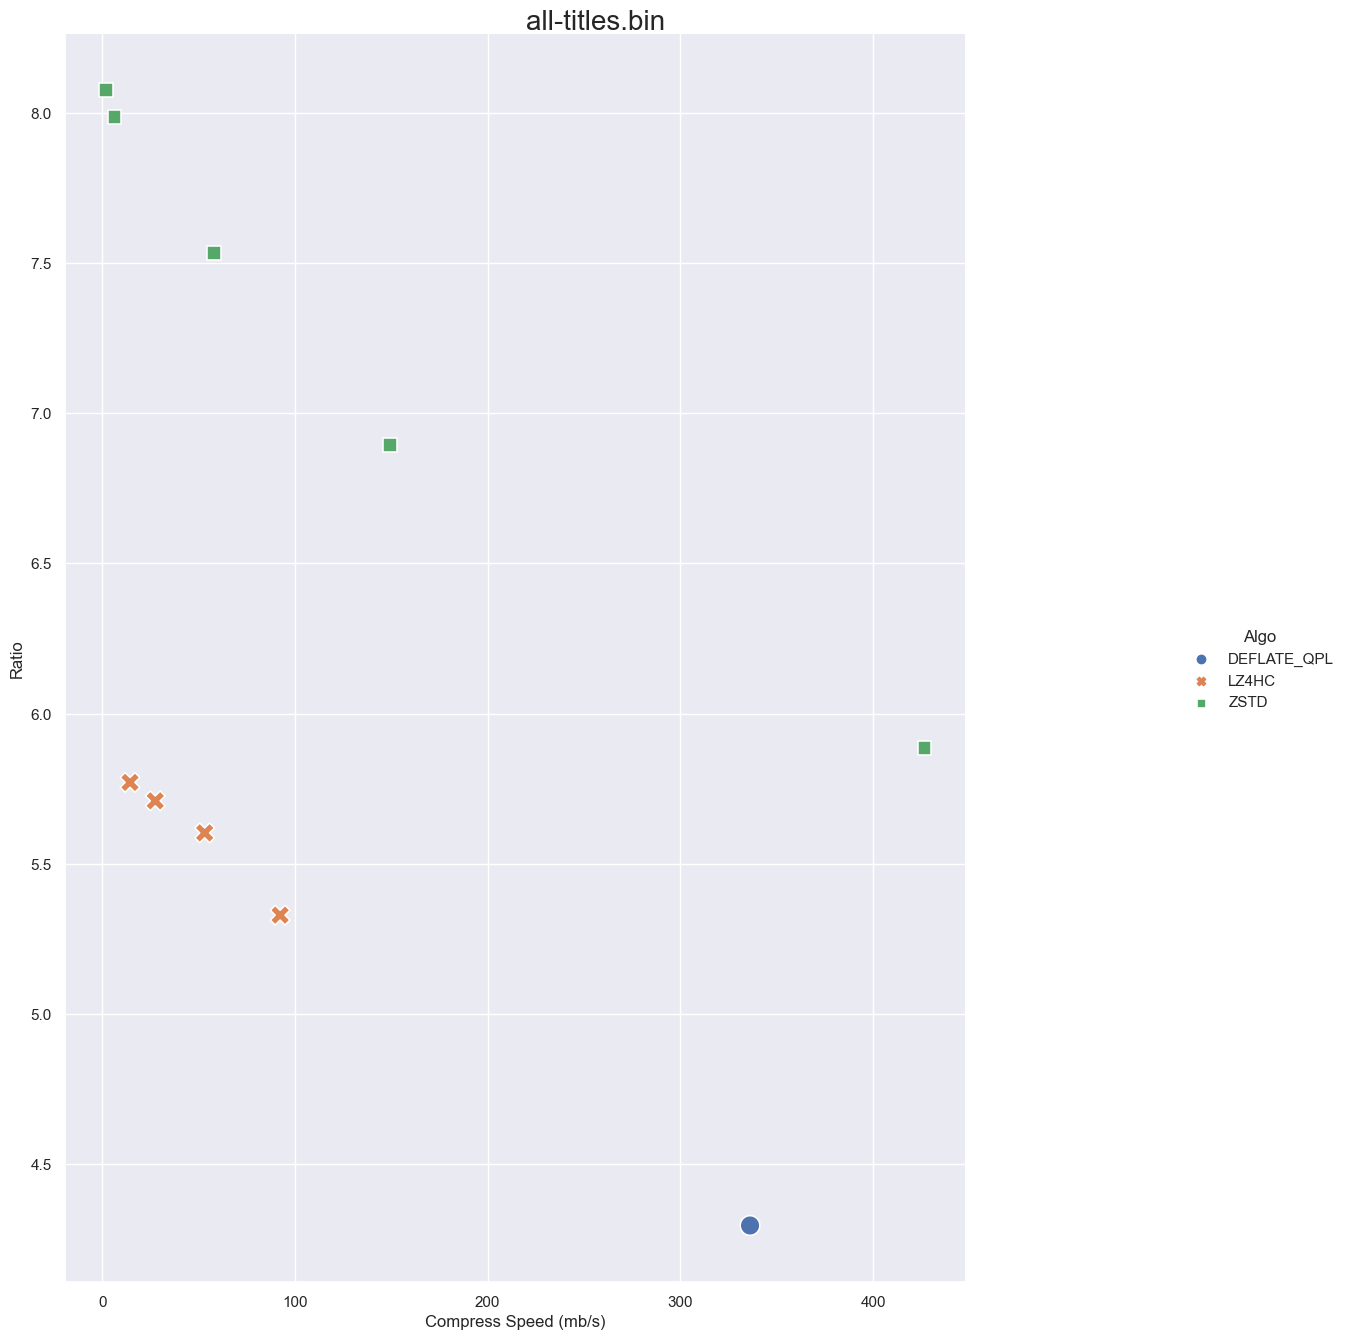

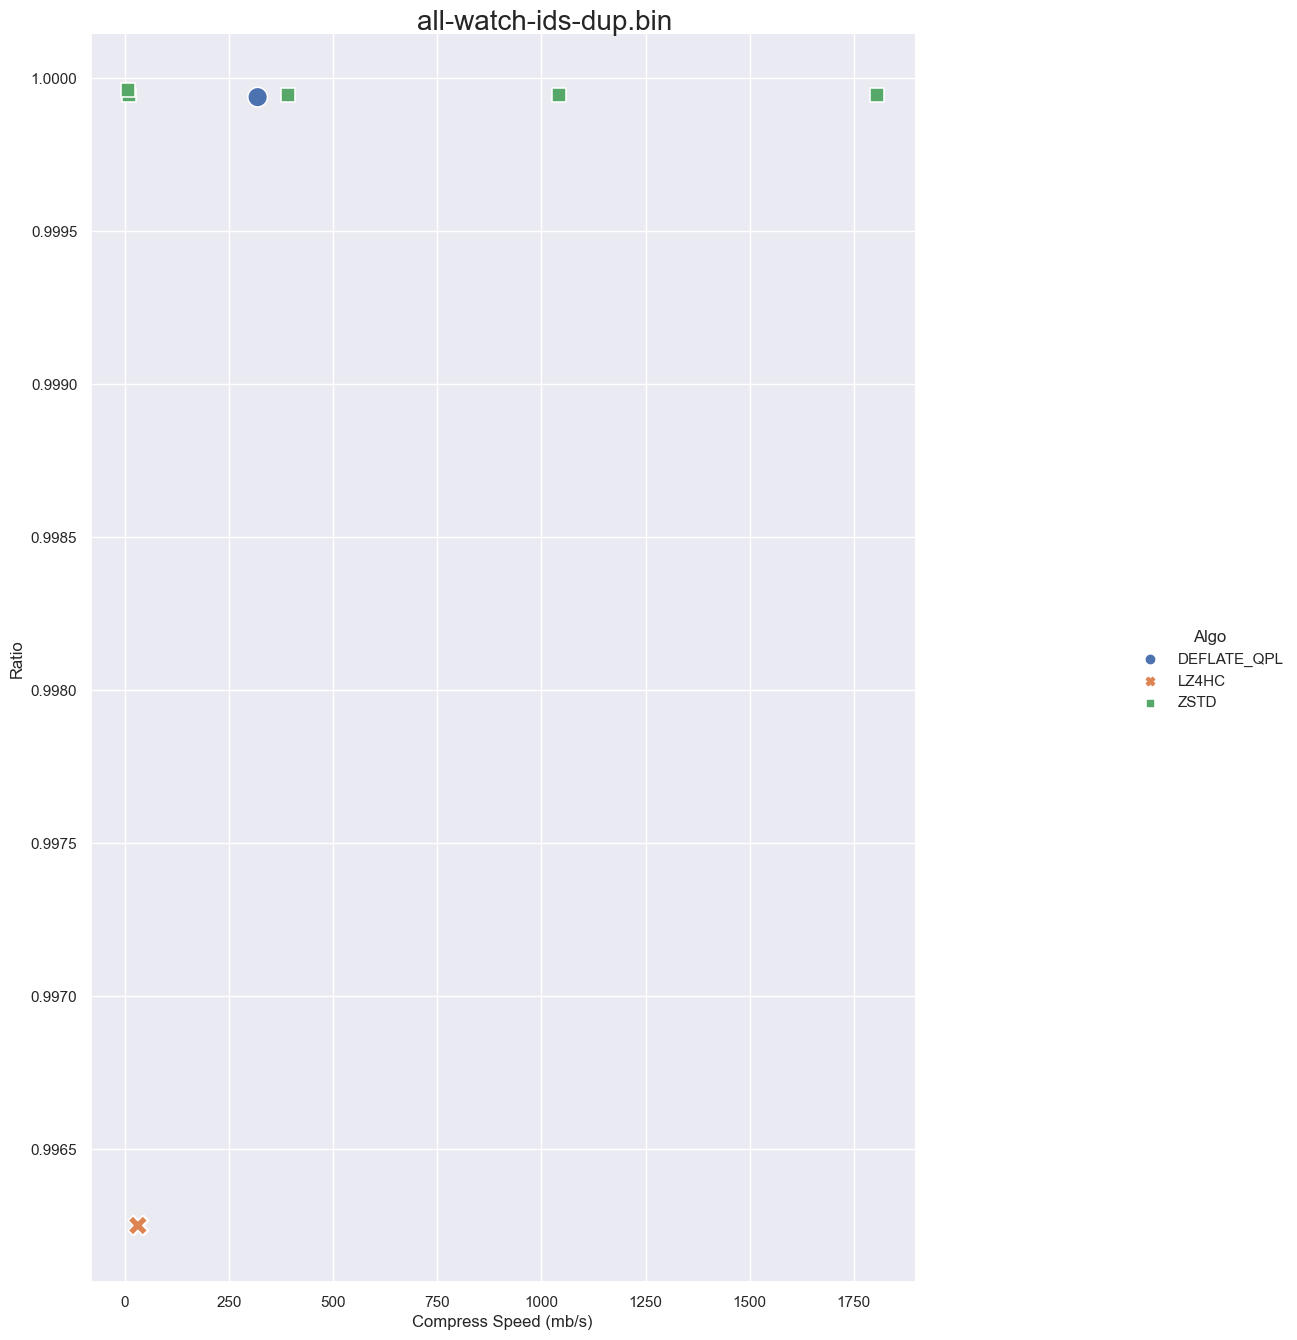

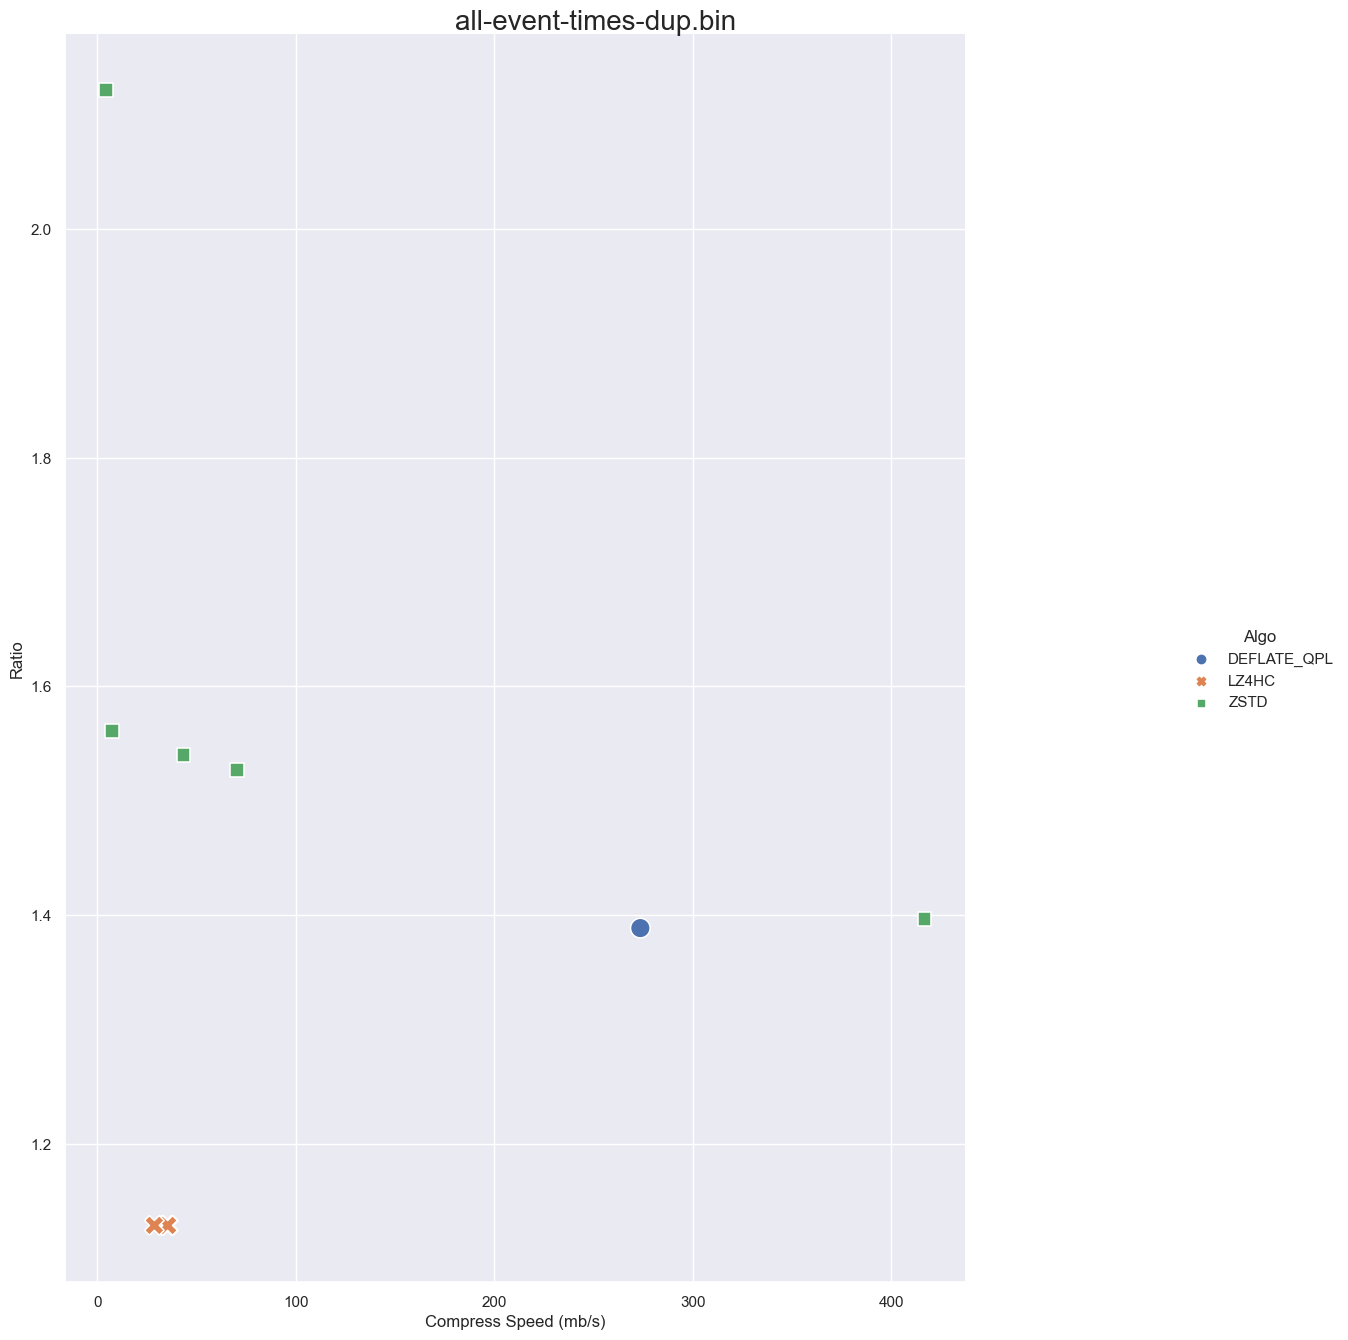

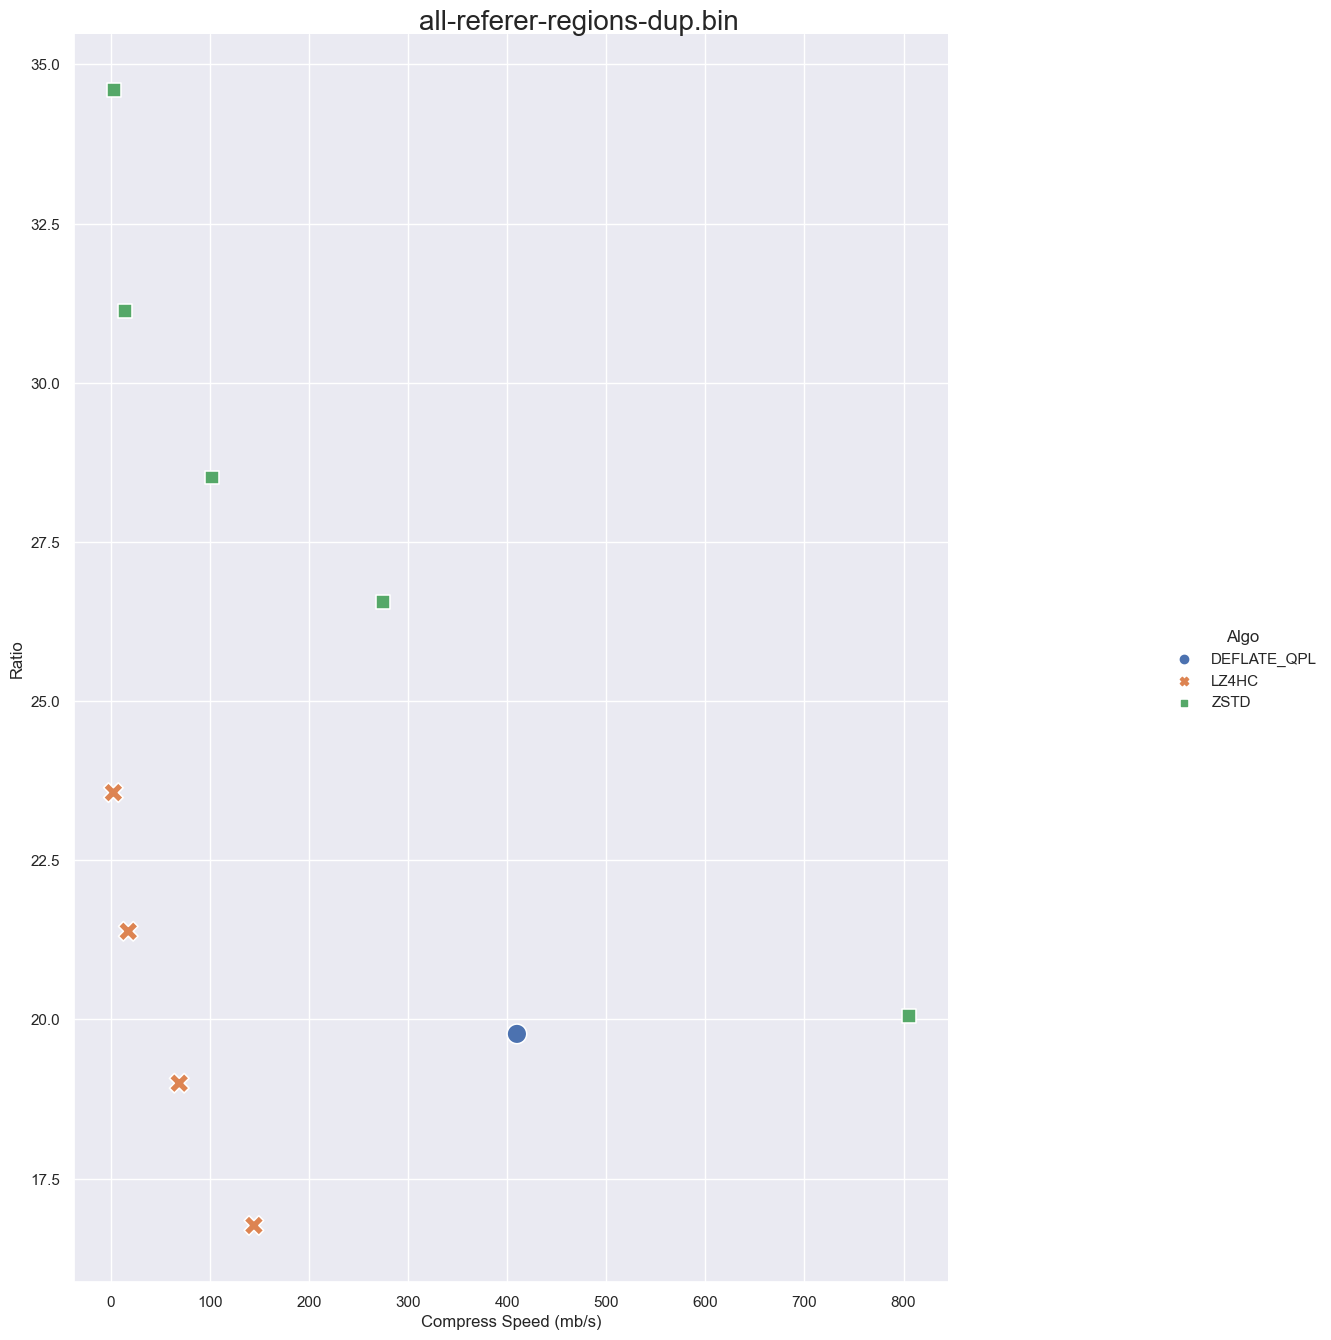

In [27]:
import seaborn as sns
from IPython.display import display
%matplotlib inline

sns.set_theme()
for file in bench_results['File'].unique():
    res = bench_results[bench_results['File'] == file]
    g = sns.relplot(
        data=res,
        x="Compress Speed (mb/s)", y="Ratio",
        hue="Algo", style="Algo", s=200
    )
    g.fig.suptitle(file, fontsize=20)
    g.fig.set_size_inches(15,15)
    g.savefig(f'speed-ratio-{file}.png', dpi=300)
    display(g)